In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data test.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [15]:
latest_date = df['InvoiceDate'].max()

In [17]:
rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (latest_date - date.max()).days,  # Recency
    'CustomerID': 'count',  # Frequency
    'UnitPrice': 'sum'    # Monetary
})

In [111]:
rfm_table.rename(columns={'InvoiceDate': 'Recency',
                           'CustomerID': 'Frequency',
                           'UnitPrice': 'Monetary'}, inplace=True)

In [112]:
print(rfm_table)

            Recency  Frequency  Monetary
CustomerID                              
12346.0         325          2      2.08
12347.0           1        182    481.21
12348.0          74         31    178.71
12349.0          18         73    605.10
12350.0         309         17     65.30
...             ...        ...       ...
18280.0         277         10     47.65
18281.0         180          7     39.36
18282.0           7         13     62.68
18283.0           3        756   1220.93
18287.0          42         70    104.55

[4372 rows x 3 columns]


In [209]:
df_rfm = pd.DataFrame(rfm_table)
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,2.08
12347.0,1,182,481.21
12348.0,74,31,178.71
12349.0,18,73,605.10
12350.0,309,17,65.30


In [210]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## K-Means Cluster

In [211]:
df_rfm_normalized = (df_rfm - df_rfm.min()) / (df_rfm.max() - df_rfm.min())

In [212]:
df_rfm_normalized.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0.871314,0.000125,0.000050
12347.0,0.002681,0.022676,0.011630
12348.0,0.198391,0.003758,0.004319
12349.0,0.048257,0.009020,0.014624
12350.0,0.828418,0.002005,0.001578


In [213]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=123)
    kmeans.fit(df_rfm_normalized)
    wcss.append(kmeans.inertia_)

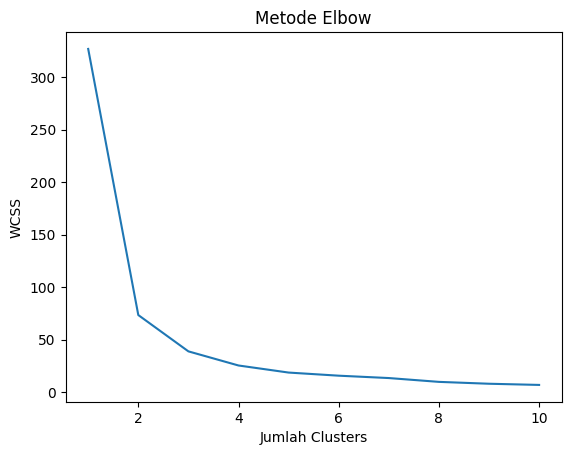

In [214]:
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

In [215]:
optimal_num_clusters = 3
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=123)
cluster_labels = kmeans.fit_predict(df_rfm_normalized)

In [216]:
df_rfm['Cluster'] = cluster_labels

In [217]:
silhouette_avg = silhouette_score(df_rfm_normalized, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6592067167463592


In [218]:
print("Hasil K-Means Clustering:")
df_rfm.head()

Hasil K-Means Clustering:


,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,2,2.08,1
12347.0,1,182,481.21,0
12348.0,74,31,178.71,0
12349.0,18,73,605.10,0
12350.0,309,17,65.30,1


In [109]:
df_rfm.to_clipboard()

## DBSCAN Cluster

In [134]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [203]:
dbscan = DBSCAN(eps=50, min_samples=10)

In [204]:
clusters = dbscan.fit_predict(df_rfm)

In [205]:
df_rfm['clusters_dbscan']=clusters

In [206]:
silhouette_avg = silhouette_score(df_rfm, clusters)
print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.6315713932013961


In [207]:
df_rfm.head()

,Recency,Frequency,Monetary,clusters_dbscan
CustomerID,,,,
12346.0,325,2,2.08,0
12347.0,1,182,481.21,0
12348.0,74,31,178.71,0
12349.0,18,73,605.10,0
12350.0,309,17,65.30,0


## Evaluasi Cluster

In [219]:
silhouette_avg_kmeans = silhouette_score(df_rfm_normalized, cluster_labels)
silhouette_avg_dbscan = silhouette_score(df_rfm, clusters)
print("Silhouette Score:", silhouette_avg_kmeans)
print("Silhouette Coefficient:", silhouette_avg_dbscan)

Silhouette Score: 0.6592067167463592
Silhouette Coefficient: 0.6315684104126512
